In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df_fake = pd.read_csv("/Users/vineethpetnakota/documents/IS 734/archive-3/Fake.csv")
df_true = pd.read_csv("/Users/vineethpetnakota/documents/IS 734/archive-3/True.csv")

In [57]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [58]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [59]:
#Inserting a column "class" as target feature

df_fake["class"] = 0
df_true["class"] = 1

In [60]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [61]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [62]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [63]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

/var/folders/lq/cw1247s92vv0ksm42yy0h9v00000gn/T/ipykernel_41880/860779283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
/var/folders/lq/cw1247s92vv0ksm42yy0h9v00000gn/T/ipykernel_41880/860779283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [64]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [65]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [66]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

In [67]:
#Merging both datasets True.csv and Fake.csv
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [21]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [68]:
#data preprocessing
#Removing columns which are not required

df = df_merge.drop(["title", "subject","date"], axis = 1)

In [69]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [70]:
df_merge.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [72]:
#Random Shuffling the dataframe
df = df.sample(frac = 1)

In [73]:
df.head()

,text,class
9055,The GOP presidential candidate who couldn t se...,0
9014,WASHINGTON (Reuters) - U.S. Senate Republicans...,1
20102,"ASTANA (Reuters) - Russia, Turkey and Iran are...",1
6662,It s a shame Barbara Boxer is leaving the Sena...,0
9651,White House Chief of Staff John Kelly says he ...,0


In [74]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [75]:
df.head()

,text,class
0,The GOP presidential candidate who couldn t se...,0
1,WASHINGTON (Reuters) - U.S. Senate Republicans...,1
2,"ASTANA (Reuters) - Russia, Turkey and Iran are...",1
3,It s a shame Barbara Boxer is leaving the Sena...,0
4,White House Chief of Staff John Kelly says he ...,0


In [76]:
df.columns

Index(['text', 'class'], dtype='object')

In [77]:
#Creating a function to process the texts

def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [78]:
df["text"] = df["text"].apply(wordopt)

In [32]:
#Defining dependent and independent variables

x = df["text"]
y = df["class"]

In [79]:
#Splitting Training and Testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [80]:
#Convert text to vectors

from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# Logistic Regression

In [81]:
#Applying logistic regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [82]:
pred_lr=LR.predict(xv_test)

In [83]:
LR.score(xv_test, y_test)

0.9868983957219252

In [84]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5880
           1       0.99      0.99      0.99      5340

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Decision Tree Classification

In [85]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [86]:
pred_dt = DT.predict(xv_test)

In [87]:
DT.score(xv_test, y_test)

0.9964349376114082

In [88]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5880
           1       1.00      1.00      1.00      5340

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



# Random forest Classifier

In [120]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [121]:
pred_rfc = RFC.predict(xv_test)

In [122]:
RFC.score(xv_test, y_test)

0.9914438502673797

In [123]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5880
           1       0.99      0.99      0.99      5340

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



# Gradient Boosting Classifier

In [125]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [126]:
pred_gbc = GBC.predict(xv_test)

In [127]:
GBC.score(xv_test, y_test)

0.9964349376114082

In [128]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5880
           1       0.99      1.00      1.00      5340

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



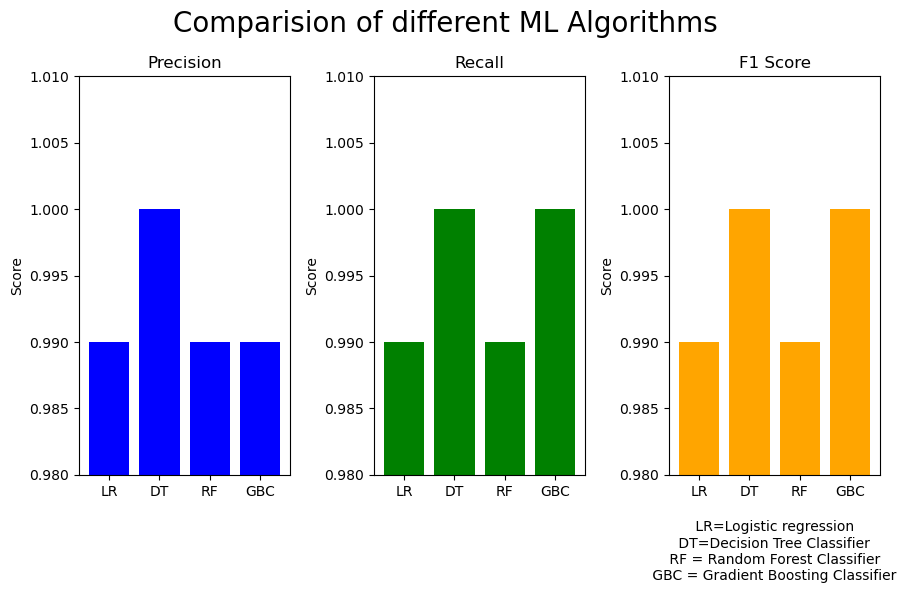

In [148]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# Data for plotting
models = ['LR','DT','RF','GBC']
precision = [0.99, 1.00, 0.99, 0.99]
recall = [0.99, 1.00, 0.99, 1]
f1_score = [0.99, 1.00, 0.99, 1]

# Plotting the comparison
plt.figure(figsize=(9, 6))


plt.subplot(1, 3, 1)
plt.bar(models, precision, color='blue')
plt.ylim(0.98, 1.01)
plt.title('Precision')
plt.ylabel('Score')

plt.subplot(1, 3, 2)
plt.bar(models, recall, color='green')
plt.ylim(0.98, 1.01)
plt.title('Recall')
plt.ylabel('Score')

plt.subplot(1, 3, 3)
plt.bar(models, f1_score, color='orange')
plt.ylim(0.98, 1.01)
plt.title('F1 Score')
plt.ylabel('Score')

plt.xlabel('\n LR=Logistic regression \n DT=Decision Tree Classifier \n RF = Random Forest Classifier \n GBC = Gradient Boosting Classifier ')
plt.suptitle('Comparision of different ML Algorithms', fontsize=20)


plt.tight_layout()
plt.show()

# Model testing 

In [178]:
from colorama import Fore


def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "True News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print(Fore.GREEN + "\n\nResults for the given Input text by the trained ML models" + "\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

# Text from Fake news dataset for model testing

In [ ]:
'''Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special 
interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, 
food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, and CBS. Yet, these corporations function under many different brands, such as FOX, ABC, CNN, Comcast, Wall Street Journal, etc, giving people the perception of choice   As Tavistock s researchers showed, it was important that the victims of mass brainwashing not be aware that their environment was being controlled; there should thus be a vast number of sources for information, whose messages could be varied slightly, so as to mask the sense of external control. ~ Specialist of mass brainwashing, L. WolfeNew Brainwashing Tactic Called AstroturfWith alternative media on the rise, the propaganda machine continues to expand. Below is a video of Sharyl Attkisson, investigative reporter with CBS, during which she explains how  astroturf,  or fake grassroots movements, are used to spin information not only to influence journalists but to sway public opinion. Astroturf is a perversion of grassroots. Astroturf is when political, corporate or other special interests disguise themselves and publish blogs, start facebook and twitter accounts, publish ads, letters to the editor, or simply post comments online, to try to fool you into thinking an independent or grassroots movement is speaking. ~ Sharyl Attkisson, Investigative ReporterHow do you separate fact from fiction? Sharyl Attkisson finishes her talk with some insights on how to identify signs of propaganda and astroturfing  These methods are used to give people the impression that there is widespread support for an agenda, when, in reality, one may not exist. Astroturf tactics are also used to discredit or criticize those that disagree with certain agendas, using stereotypical names such as conspiracy theorist or quack. When in fact when someone dares to reveal the truth or questions the  official  story, it should spark a deeper curiosity and encourage further scrutiny of the information.This article (Journalist Reveals Tactics Brainwashing Industry Uses to Manipulate the Public) was originally created and published by Waking Times and is published here under a Creative Commons license with attribution to Vic Bishop and WakingTimes.com. It may be re-posted freely with proper attribution, author bio, and this copyright statement. READ MORE MSM PROPAGANDA NEWS AT: 21st Century Wire MSM Watch Files'''

In [179]:
#Giving fake news text as input and analysing results for the trained models 

news = str(input())
manual_testing(news)

'''Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special  interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism,  food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warn

# Text from True news dataset for model testing

In [ ]:
'''BRUSSELS (Reuters) - NATO allies on Tuesday welcomed President Donald Trump s decision to commit more forces to 
Afghanistan, as part of a new U.S. strategy he said would require more troops and funding from America s partners. 
Having run for the White House last year on a pledge to withdraw swiftly from Afghanistan, Trump reversed course on Monday and promised a stepped-up military campaign against  Taliban insurgents, saying:  Our troops will fight to win .  U.S. officials said he had signed off on plans to send about 4,000 more U.S. troops to add to the roughly 8,400 now deployed in Afghanistan. But his speech did not define benchmarks for successfully ending the war that began with the U.S.-led invasion of Afghanistan in 2001, and which he acknowledged had required an   extraordinary sacrifice of blood and treasure .  We will ask our NATO allies and global partners to support our new strategy, with additional troops and funding increases in line with our own. We are confident they will,  Trump said. That comment signaled he would further increase pressure on U.S. partners who have already been jolted by his repeated demands to step up their contributions to NATO and his description of the alliance as  obsolete  - even though, since taking office, he has said this is no longer the case. NATO Secretary General Jens Stoltenberg said in a statement:  NATO remains fully committed to Afghanistan and I am looking forward to discussing the way ahead with (Defense) Secretary (James) Mattis and our Allies and international partners.  NATO has 12,000 troops in Afghanistan, and 15 countries have pledged more, Stoltenberg said. Britain, a leading NATO member, called the U.S. commitment  very welcome .  In my call with Secretary Mattis yesterday we agreed that despite the challenges, we have to stay the course in Afghanistan to help build up its fragile democracy and reduce the terrorist threat to the West,  Defence Secretary Michael Fallon said. Germany, which has borne the brunt of Trump s criticism over  the scale of its defense spending, also welcomed the new U.S. plan.  Our continued commitment is necessary on the path to stabilizing the country,  a government spokeswoman said. In June, European allies had already pledged more troops but had not given details on numbers, waiting for the Trump administration to outline its strategy for the region.Nearly 16 years after the U.S.-led invasion - a response to the Sept. 11 attacks which were planned by al Qaeda leader Osama bin Laden from Afghanistan - the country is still struggling with weak central government and a Taliban insurgency. Trump said he shared the frustration of the American people who were  weary of war without victory , but a hasty withdrawal would create a vacuum for groups like Islamic State and al Qaeda to fill.'''

In [180]:
#Giving true news text as input and analysing results for the trained models 

news = str(input())
manual_testing(news)

'''BRUSSELS (Reuters) - NATO allies on Tuesday welcomed President Donald Trump s decision to commit more forces to  Afghanistan, as part of a new U.S. strategy he said would require more troops and funding from America s partners.  Having run for the White House last year on a pledge to withdraw swiftly from Afghanistan, Trump reversed course on Monday and promised a stepped-up military campaign against  Taliban insurgents, saying:  Our troops will fight to win .  U.S. officials said he had signed off on plans to send about 4,000 more U.S. troops to add to the roughly 8,400 now deployed in Afghanistan. But his speech did not define benchmarks for successfully ending the war that began with the U.S.-led invasion of Afghanistan in 2001, and which he acknowledged had required an   extraordinary sacrifice of blood and treasure .  We will ask our NATO allies and global partners to support our new strategy, with additional troops and funding increases in line with our own. We are confident t